            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
       Passengers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000


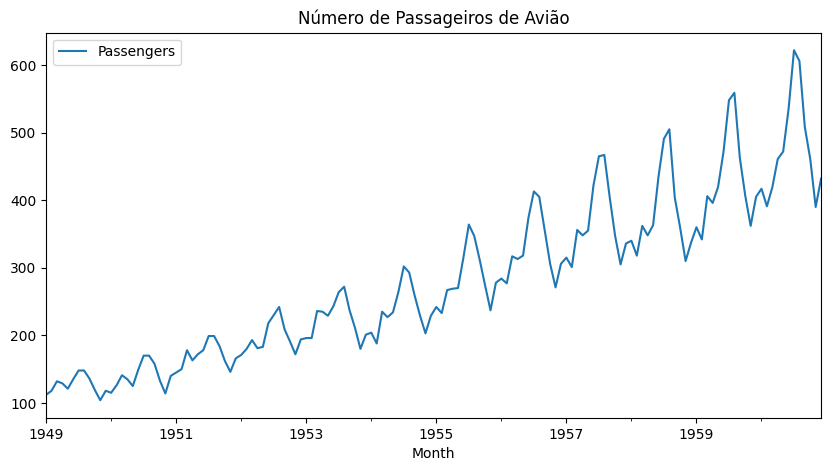

Valores nulos: Passengers    0
dtype: int64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

ARIMA - MAE: 67.3835005901074 RMSE: 80.66394528577948
SARIMA - MAE: 23.552466101312756 RMSE: 30.138915559001813


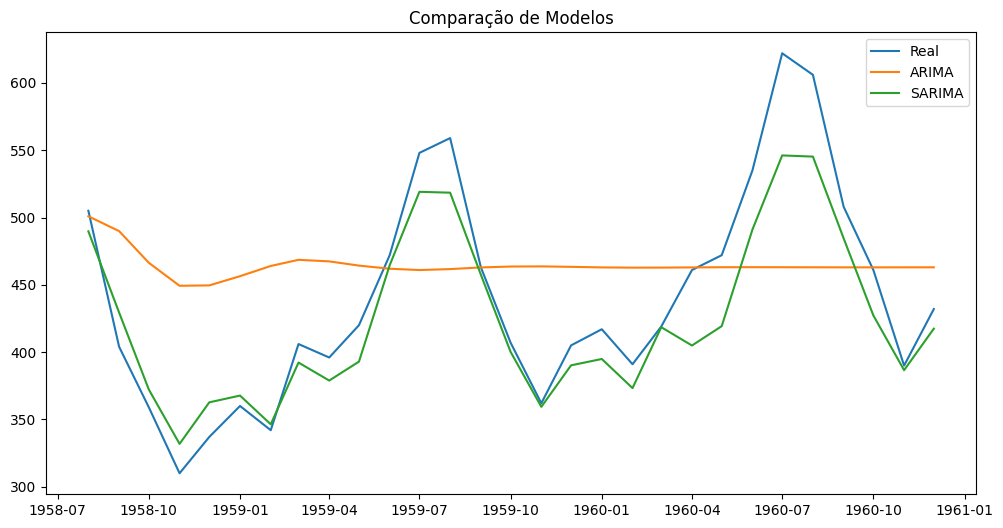

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

#-------------------------------------------------------#
# Definição de uma base de dados
# Analise os dados
# Trate os dados
# Escolha 2 modelos em função dos itens anteriores
# Defina as métricas de avaliação
# Compare os modelos
#-------------------------------------------------------#

# 1. Carregar e definir a base de dados (exemplo: vendas mensais de um produto)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# 2. Analisar os dados
print(df.head())
print(df.describe())
df.plot(figsize=(10,5), title='Número de Passageiros de Avião')
plt.show()

# 3. Tratar os dados (checar valores nulos e transformar se necessário)
print("Valores nulos:", df.isnull().sum())
df.columns = ['Passengers']  # Renomeando para facilitar

# 4. Escolher dois modelos (ARIMA e SARIMA)

# Modelo 1: ARIMA
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

arima_model = ARIMA(train, order=(5,1,0))
arima_fit = arima_model.fit()
forecast_arima = arima_fit.forecast(steps=len(test))

# Modelo 2: SARIMA
sarima_model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_fit = sarima_model.fit()
forecast_sarima = sarima_fit.forecast(steps=len(test))

# 5. Definir métricas de avaliação
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return mae, rmse

mae_arima, rmse_arima = evaluate_model(test['Passengers'], forecast_arima)
mae_sarima, rmse_sarima = evaluate_model(test['Passengers'], forecast_sarima)

# 6. Comparar os modelos
print("ARIMA - MAE:", mae_arima, "RMSE:", rmse_arima)
print("SARIMA - MAE:", mae_sarima, "RMSE:", rmse_sarima)

# Plotando previsões
plt.figure(figsize=(12,6))
plt.plot(test.index, test['Passengers'], label='Real')
plt.plot(test.index, forecast_arima, label='ARIMA')
plt.plot(test.index, forecast_sarima, label='SARIMA')
plt.legend()
plt.title("Comparação de Modelos")
plt.show()


#-------------------------------------------------------#
# MAE (Erro Médio Absoluto): Média da diferença entre valores reais e previstos.
# RMSE (Erro Quadrático Médio): Penaliza erros maiores, sendo útil para avaliar precisão.
#
# Comparação:
# O SARIMA teve um desempenho muito melhor que o ARIMA, com MAE e RMSE bem menores.
# Isso acontece porque o SARIMA captura a sazonalidade (padrões recorrentes anuais), enquanto o ARIMA não.
#
# ARIMA - MAE: 67.3835005901074 RMSE: 80.66394528577948
# SARIMA - MAE: 23.552466101312756 RMSE: 30.138915559001813
#-------------------------------------------------------#

In [ ]:
#